### 정렬 알고리즘

- 정렬(sorting)이란 데이터를 특정한 기준에 따라 순서대로 나열하는 것
- 일반 적으로 문제 상황에 따라서 적절한 정렬 알고리즘이 공식처럼 사용됨

#### 선택 정렬
: 처리되지 않은 데이터 중에서 가장 작은 데이터를 선택해 맨 앞에 있는 데이터와 바꾸는 것을 반복

- 시간 복잡도 : N번 만큼 가장 작은 수를 찾아서 맨 앞으로 보내야함
            -> 전체 연산 횟수 : N + (N-1) + (N-2) .... = (N^2 + N - 2)/2 : O(N^2) [빅오 표기법]

In [2]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(len(array)):
    min_index = i # 가장 작은 원소의 인덱스
    for j in range(i + 1, len(array)):
        if array[min_index] > array[j]:
            min_index = j
    array[i], array[min_index] = array[min_index], array[i] # 스와프

print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### 삽입 정렬
: 처리되지 않은 데이터를 하나씩 골라 적절한 위치에 삽입

: 선택 정렬에 비해 구현 난이도가 높은 편이지만, 일반적으로 더 효율적으로 동작함

- 시간 복잡도  

    : O(N^2), 선택 정렬과 마찬가지로 반복문이 두번 중첩되어 사용됨
    
    : 삽입 정렬은 현재 리스트의 데이터가 거의 정렬되어 있는 상태라면 매우 빠르게 동작함
    
    : 최선의 경우 O(N)의 시간 복잡도를 가짐

In [3]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(1, len(array)):
    for j in range(i, 0, -1): # 인덱스 i부터 1씩 감소하며 반복하는 문법
        if array[j] < array[j-1]: # 한 칸 씩 왼쪽으로 이동
            array[j], array[j-1] = array[j-1], array[j]
        else: # 자기보다 작은 데이터를 만나면 그 위치에서 멈춤
            break
            
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### 퀵 정렬
: 기준 데이터를 설정하고 그 기준보다 큰 데이터와 작은 데이터의 위치를 바꾸는 방법

: 일반적인 상황에서 가장 많이 사용되는 정렬 알고리즘 중 하나

: 병합 정렬과 더불어 대부분의 프로그래밍 언어의 정렬 라이브러리의 근간이 되는 알고리즘

: 가장 기본적인 퀵 정렬은 첫 번째 데이터를 기준 데이터(pivot)로 설정함

- 퀵 정렬이 빠른 이유 : 이상적인 경우 분할이 절반씩 일어난다면 전체 연산 횟수로 O(NlogN)를 기대할 수 있음

- 시간 복잡도 : 평균의 경우 O(NlogN), 최악의 경우 O(N^2)

In [4]:
array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array, start, end):
    if start >= end: # 원소가 1개인 경우 종료
        return
    pivot = start # 피벗은 첫 번째 원소
    left = start + 1
    right = end
    
    while left <= right: # 엇갈리기 전까지 반복
        # 피벗보다 큰 데이터를 찾을 때까지 반복
        while left <= end and array[left] <= array[pivot]:
            left += 1
        # 피벗 보다 작은 데이터를 찾을 때 까지 반복
        while right > start and array[right] >= array[pivot]:
            right -= 1
        ## (=> array의 양쪽에서 정렬 시도)
        
        if left > right: # 엇갈렸다면 작은 데이터와 피벗을 교체
            array[right], array[pivot] = array[pivot], array[right]
        else: # 엇갈리지 않았다면 작은 데이터와 큰 데이터를 교체
            array[left], array[right] = array[right], array[left]
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬을 수행
    quick_sort(array, start, right - 1)
    quick_sort(array, right +1, end)
    
quick_sort(array, 0, len(array)-1)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
# 파이썬의 장점을 살린 방식으로 구현한 퀵정렬

array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array):
    # 리스트가 하나 이하의 원소를 담고 있다면 종료
    if len(array) <= 1:
        return array
    pivot = array[0] # 첫 번째 원소를 피벗으로 지정
    tail = array[1:] # 피벗을 제외한 리스트
    
    left_side = [x for x in tail if x <= pivot] # 분할된 왼쪽 부분
    right_side = [x for x in tail if x > pivot] # 분할된 오른쪽 부분
    
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행하고 전체 리스트 반환
    return quick_sort(left_side) + [pivot] + quick_sort(right_side)

print(quick_sort(array))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### 계수 정렬
: 특정 조건이 부합할 때만 사용할 수 있지만 매우 빠르게 동작하는 정렬 알고리즘

        - 계수 정렬은 데이터의 크기 범위가 제한되어 정수 형태로 표현할 수 있을 때 사용 가능

: 데이터의 개수가 N, 데이터(양수) 중 최댓값이 K일 때 최악의 경우에도 수행시간 O(N+K)를 보장

: 시간 복잡도와 공간 복잡도 모두 O(N+K)

: 때에 따라서 심각한 비효율 성을 초래할 수 있음

: 동일한 값을 가지는 데이터가 여러 개 등장할 때 효과적으로 사용 가능

In [6]:
# 모든 원소의 값이 0보다 크거나 같다고 가정
array = [7, 5, 9, 0, 3, 1, 6, 2, 9, 1, 4, 8, 0, 5, 2]
# 모든 범위를 포함하는 리스트 선언(모든 값은 0으로 초기화)
count = [0] * (max(array) +1)

for i in range(len(array)):
    count[array[i]] += 1 # 각 데이터에 해당하는 인덱스의 값 증가
    
for i in range(len(count)): # 리스트에 기록된 정렬 정보 확인
    for j in range(count[i]): 
        print(i, end = ' ') # 띄어쓰기를 구분으로 등장한 횟수만큼 인덱스 출력

0 0 1 1 2 2 3 4 5 5 6 7 8 9 9 


표준 정렬 라이브러리(.sort())는 최악의 경우에도 O(NlogN)을 보장



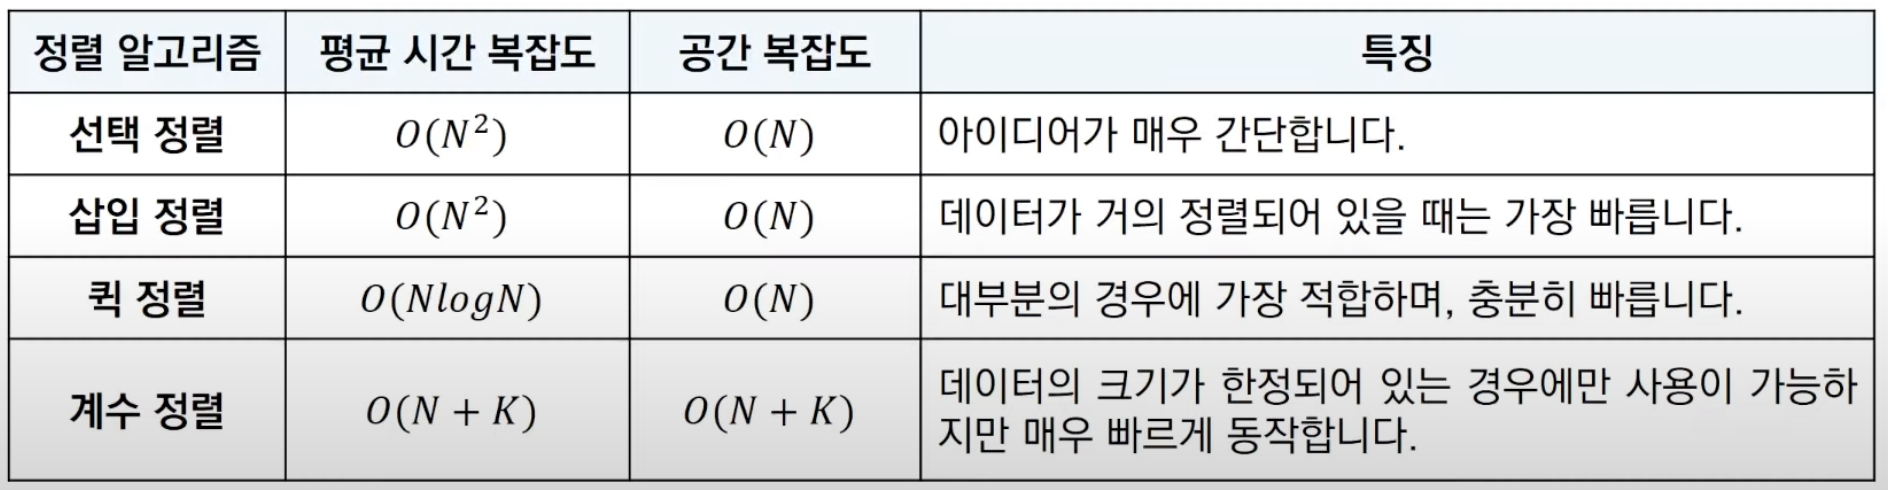

In [12]:
from PIL import Image
print('''
표준 정렬 라이브러리(.sort())는 최악의 경우에도 O(NlogN)을 보장
''')
Image.open('./sorting.png')

In [13]:
# 선택 정렬과 기본 정렬 라이브러리 수행 시간 비교

from random import randint
import time

array = []
for _ in range(10000):
    array.append(randint(1, 100))
    
start_time = time.time()

for i in range(len(array)):
    min_index = i
    for j in range(i+1, len(array)):
        if array[min_index] > array[j]:
            min_index = j
    array[i], array[min_index] = array[min_index], array[i]
    
end_time = time.time()
print('선택 정렬 수행 시간: ', end_time - start_time, '\n')

array2 = []
for _ in range(10000):
    array2.append(randint(1, 100))
    
start_time2 = time.time()

array.sort()

end_time2 = time.time()
print('표준 정렬 라이브러리 수행 시간: ', end_time2 - start_time2)

선택 정렬 수행 시간:  3.7392361164093018 

표준 정렬 라이브러리 수행 시간:  5.125999450683594e-05


In [18]:
n, k = map(int, input().split())
a = list(map(int, input().split()))
b = list(map(int, input().split()))

'''
k번의 바꿔치기로 a의 원소의 합이 최대가 되어야함
-> a의 최소값과 b의 최대값, a의 그 다음 최소값과 b의 그 다음 최대값을 바꾸면
   a의 원소의 합이 최대가 될 듯!
'''

while True:
    a.insert(a.index(min(a)), max(b))
    b.remove(max(b))
    b.insert(b.index(max(b)), min(a))
    a.remove(min(a))
    k -= 1
    
    if k < 1:
        break
        
print(sum(a))

5 3
1 2 5 4 3
5 5 6 6 5
26


In [19]:
# solution

# 핵심 아이디어 : 매번 a에서 가장 작은 원소를 골라서 b에서 가장 큰 원소와 교체
# 이 문제에서는 두 배열의 원소가 최대 100,000개 까지 입력될 수 있으므로, 최악의 경우에도 O(NlogN)을 보장하는 정렬 알고리즘을 이용해야함

n, k = map(int, input().split())
a = list(map(int, input().split()))
b = list(map(int, input().split()))

a.sort()
b.sort(reverse=True)

for i in range(k):
    if a[i] < b[i]: # a의 원소가 b의 원소보다 작은 경우
        a[i], b[i] = b[i], a[i] # 두 원소 교체
    else: # a의 원소가 b의 원소보다 크거나 같을 때 반복문 탈출
        break
    
print(sum(a))

5 3
1 2 5 4 3
5 5 6 6 5
26
